In [402]:
import numpy as np
from qiskit.circuit import QuantumCircuit

### A prepares 0,1,3,4,5,7

In [450]:
def A(n):
    qc = QuantumCircuit(n)
    qc.ry(54.735610,0)
    qc.ch(0,1)
    qc.h(2)
    
    return qc

In [451]:
def Ad(n):
    qc = QuantumCircuit(n)
    qc.ry(54.735610,0)
    qc.ch(0,1)
    qc.h(2)
    
    qcd = qc.to_gate().inverse()
    qcd.label = 'Ad'

    return qcd

### Grover Operator

In [452]:
def G(n):

    qc = QuantumCircuit(n)
    
    # ORACLES - 
    
    #Oracle1 - marks the even states
    qc.x(0)   
    qc.z(0)
    qc.x(0)

    #Oracle2 - marks 2 states
#     qc.cz(0,n-1)

    
    #Oracle3 - marks 1 state (111)
#     qc.h(n-1)
#     qc.ccx(0,1,n-1)
#     qc.h(n-1)

    
    #Oracle4 - marks 2 states
#    qc.z(1)
    
    
    #Oracle5 - marks 3 states
#     qc.x(2)
#     qc.z(2)
#     qc.x(2)
    
    
    #Oracle6 - marks 5 states (only if we have 4 qubit Grover op)
#     qc.h([2,3])
#     qc.ccx(0,1,2)
#     qc.h(2)
#     qc.x(2)
#     qc.ccx(0,2,3)
#     qc.x(2)
#     qc.h(3)
#     qc.x([1,3])
#     qc.h(2)
#     qc.mct([0,1,3],2)
#     qc.x([1,3])
#     qc.h(2)
    
    # DIFFUSER - 
    
    #Adagger for Uniform Sup
    #qc.h(range(n))
    
    #Adagger for this A
    qc.append(Ad(n), list(range(n)))

    qc.x(list(range(n)))
    qc.h(0)
    qc.mct(list(range(1,n)),0)
    qc.h(0)
    qc.x(list(range(n)))
    
    #qc.h(range(n))
    qc.append(A1(n), list(range(n)))
    
    return qc

In [453]:
A= A(3)
Q= G(3)

In [454]:
from qiskit.algorithms import EstimationProblem

problem = EstimationProblem(
    state_preparation=A,  # A operator
    grover_operator=Q,  # Q operator
    objective_qubits=[0,4],  # We have to put the good states here but it doesn't even matter
)

In [455]:
from qiskit import BasicAer
from qiskit.utils import QuantumInstance

backend = BasicAer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend)

In [456]:
from qiskit.algorithms import AmplitudeEstimation

ae = AmplitudeEstimation(
    num_eval_qubits=3,  # the number of evaluation qubits specifies circuit width and accuracy
    quantum_instance=quantum_instance
)

In [464]:
ae_result = ae.estimate(problem)

### Its giving us Maximum Likelihood estimation of probability, which is just an improvement over normal answer

In [466]:
print('Interpolated MLE estimator:', ae_result.mle)

Interpolated MLE estimator: 0.6199493190741565


In [467]:
a = ae_result.mle #this is sin^2(theta)
N = 6
M = N * a
print("No. of Solutions = %.1f" % (N-M))

No. of Solutions = 2.3


### We're mostly getting correct answer if we round of to nearest Integer

## Decomposing Circuit

They're decomposing the initial state prep circuit this way maybe because controlled-H is present in it and they're using basic gates only

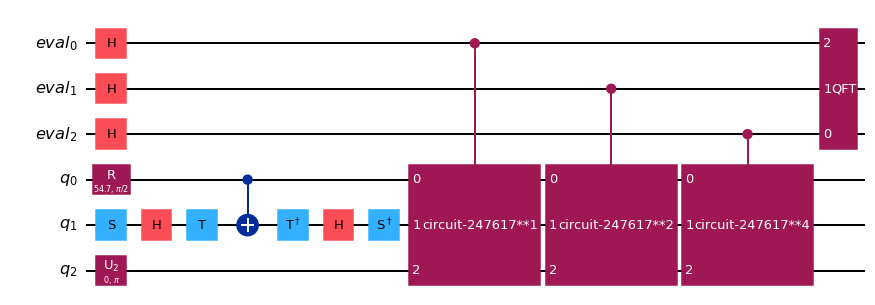

In [469]:
ae_circuit = ae.construct_circuit(problem)
ae_circuit.decompose().draw('mpl', style='iqx') 

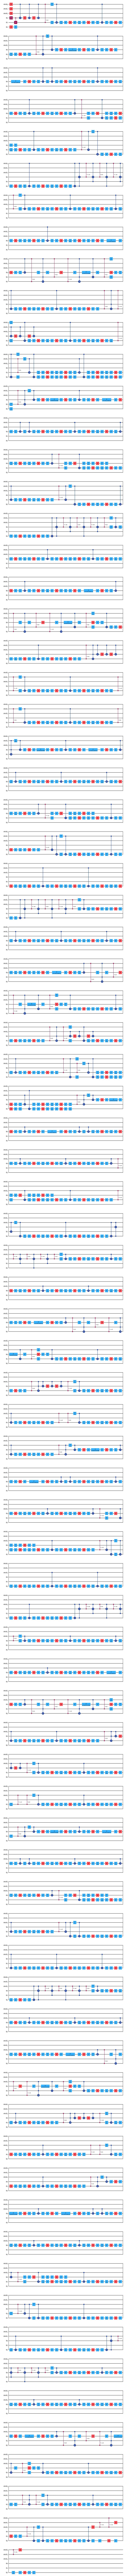

In [471]:
from qiskit import transpile


basis_gates = ['h', 'ry', 'cry', 'cx', 'ccx', 'p', 'cp', 'x', 's', 'sdg', 'y', 't', 'cz','ch']
transpile(ae_circuit, basis_gates=basis_gates, optimization_level=2).draw('mpl', style='iqx')